In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Approximators import BernsteinLegendre, Bernstein

# Bernstein

In [3]:
approximator = Bernstein.CauchySimplex(4, 4, num_integration_points=401)

In [4]:
f = lambda x: abs(x - 0.5)
approximator.fit(f, max_iter=100, stopping_tol=1e-8, verbose=True)

64: 2.0505767075299024e-07


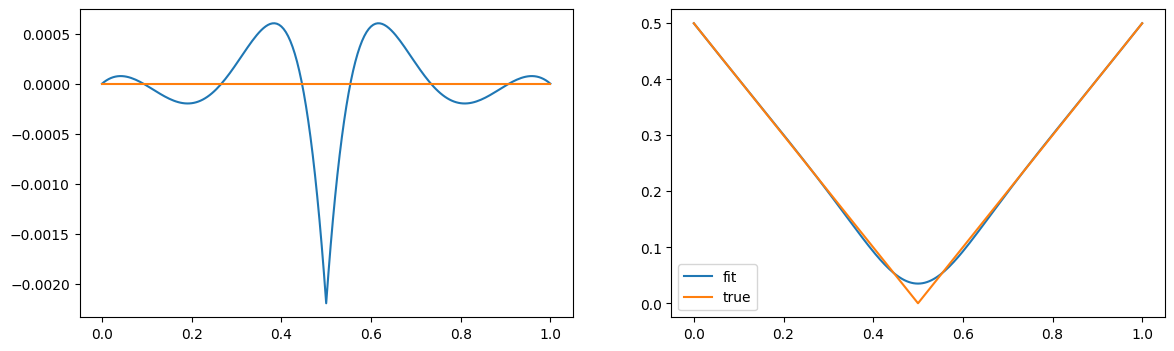

In [5]:
x = np.linspace(0, 1, 201)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(x, f(x) * approximator.denominator(x) - approximator.numerator(x), '-', label='fit')
plt.plot(x, np.zeros(len(x)))

plt.subplot(1, 2, 2)
plt.plot(x, approximator.numerator(x) / approximator.denominator(x), label='fit')
plt.plot(x, f(x), label='true')
plt.legend();

In [6]:
f = lambda x: np.sqrt(abs(x - 0.5))
approximator.fit(f, max_iter=100, stopping_tol=1e-8, verbose=True)  # Still using a (4, 4) rational function

15: 3.5518153474242325e-06


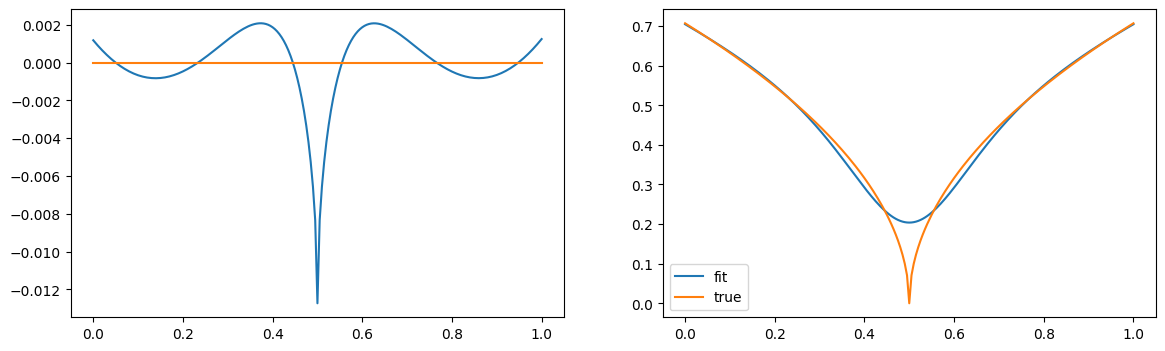

In [7]:
x = np.linspace(0, 1, 201)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(x, f(x) * approximator.denominator(x) - approximator.numerator(x), '-', label='fit')
plt.plot(x, np.zeros(len(x)))

plt.subplot(1, 2, 2)
plt.plot(x, approximator.numerator(x) / approximator.denominator(x), label='fit')
plt.plot(x, f(x), label='true')
plt.legend();

# BernsteinLegendre

In [8]:
approximator = BernsteinLegendre.CauchySimplex(4, 4, num_integration_points=401)

In [9]:
f = lambda x: abs(x - 0.5)
approximator.fit(f, max_iter=100, stopping_tol=1e-8, verbose=True)

100: 1.04361531974717e-05 


/Users/jameschok/git/RationalFunction/Approximators/BernsteinLegendre/CauchySimplex.py:75: UserWarning: Maximum number of iterations has been reached and convergence is not guaranteed. Try increasing `max_iter` or decreasing `stopping_tol`.
  warnings.warn("Maximum number of iterations has been reached and convergence is not guaranteed. "


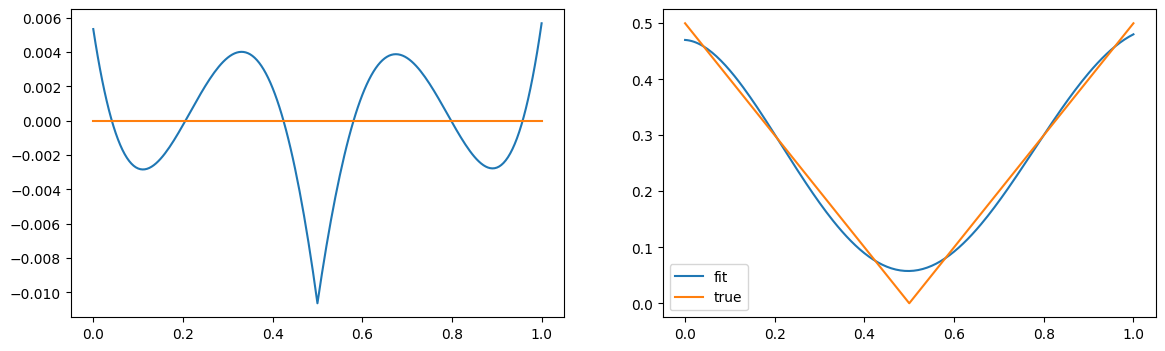

In [10]:
x = np.linspace(0, 1, 201)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(x, f(x) * approximator.denominator(x) - approximator.numerator(x), '-', label='fit')
plt.plot(x, np.zeros(len(x)))

plt.subplot(1, 2, 2)
plt.plot(x, approximator.numerator(x) / approximator.denominator(x), label='fit')
plt.plot(x, f(x), label='true')
plt.legend();

In [11]:
f = lambda x: np.sqrt(abs(x - 0.5))
approximator.fit(f, max_iter=100, stopping_tol=1e-8, verbose=True)  # Still using a (4, 4) rational function

100: 6.222015492113242e-05


/Users/jameschok/git/RationalFunction/Approximators/BernsteinLegendre/CauchySimplex.py:75: UserWarning: Maximum number of iterations has been reached and convergence is not guaranteed. Try increasing `max_iter` or decreasing `stopping_tol`.
  warnings.warn("Maximum number of iterations has been reached and convergence is not guaranteed. "


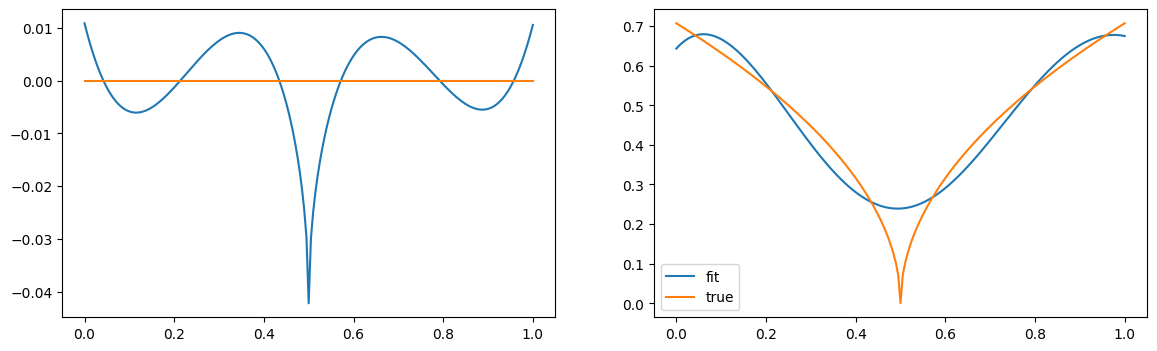

In [12]:
x = np.linspace(0, 1, 201)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(x, f(x) * approximator.denominator(x) - approximator.numerator(x), '-', label='fit')
plt.plot(x, np.zeros(len(x)))

plt.subplot(1, 2, 2)
plt.plot(x, approximator.numerator(x) / approximator.denominator(x), label='fit')
plt.plot(x, f(x), label='true')
plt.legend();